In [43]:
import pandas as pd
#read the data
data = pd.read_csv('./California_housing_price_data.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
#drop the ocean_proximity column as it is not a numerical column
categorical_data = data['ocean_proximity']
data = data.drop('ocean_proximity', axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [46]:
#standardization of data
from sklearn.preprocessing import StandardScaler
print("Data Before Standardization:")
print(data.head())

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
print("\n\n Data After Standardization:")
print(data_std)

Data Before Standardization:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  


 Data After Standardization:
[[-1.32783522  1.05254828  0.98214266 ... -0.97703285  2.34476576
   2.12963148]
 [-1.32284391  1.04318455 -0.6

In [21]:
# MinMaxScaler for normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)
print("Data After Min Max Scaling:")
print(data_scaled)

Data After Min Max Scaling:
[[0.21115538 0.5674814  0.78431373 ... 0.02055583 0.53966842 0.90226638]
 [0.21215139 0.565356   0.39215686 ... 0.18697583 0.53802706 0.70824656]
 [0.21015936 0.5642933  1.         ... 0.02894261 0.46602805 0.69505074]
 ...
 [0.31175299 0.73219979 0.31372549 ... 0.07104095 0.08276438 0.15938285]
 [0.30179283 0.73219979 0.33333333 ... 0.05722743 0.09429525 0.14371281]
 [0.30976096 0.72582359 0.29411765 ... 0.08699227 0.13025338 0.15340349]]


In [47]:
# using pandas for dummy variables
print("Data Before Dummy Variables:")
print(categorical_data.head())
dummy_data = pd.get_dummies(categorical_data)
print("\n\n Data After Dummy Variables:")
print(dummy_data.head())

Data Before Dummy Variables:
0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object


 Data After Dummy Variables:
   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          0       0       0         1           0
1          0       0       0         1           0
2          0       0       0         1           0
3          0       0       0         1           0
4          0       0       0         1           0


In [48]:
# using sklearn for LabelEncoder 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_categorical_data = encoder.fit_transform(categorical_data)
print("Data After Label Encoder:")
print(new_categorical_data)

Data After Label Encoder:
[3 3 3 ... 1 1 1]


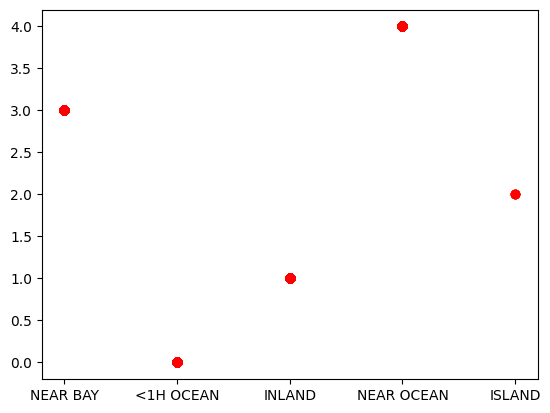

In [49]:
# yop can see here how label encoder works and choose the best one for your data
import matplotlib.pyplot as plt
plt.scatter(categorical_data, new_categorical_data, color='red')
plt.show()

In [50]:
# Frequency Encoding : it is used when the categories are not ordinal and there is no relationship between them
cat_column = categorical_data.map(categorical_data.value_counts())
cat_column

0        2290
1        2290
2        2290
3        2290
4        2290
         ... 
20635    6551
20636    6551
20637    6551
20638    6551
20639    6551
Name: ocean_proximity, Length: 20640, dtype: int64

In [51]:
# puling the categories from the data
import re
print('categories before pulling:', categorical_data[0])
pull_categorical = categorical_data.apply(lambda x: re.findall("\w+", x)[0])
print('categories after pulling:', pull_categorical[0])

categories before pulling: NEAR BAY
categories after pulling: NEAR


In [52]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [62]:
# Date Time Features : we can extract the date time features from the date column
stock_data = pd.read_csv('./AMBUJACEM.csv')
print(stock_data.Date.head())

new_data = pd.DataFrame()

# extracting the date time features
new_data['year'] = pd.DatetimeIndex(stock_data['Date']).year
new_data['month'] = pd.DatetimeIndex(stock_data['Date']).month
new_data['day'] = pd.DatetimeIndex(stock_data['Date']).day
new_data['dayofweek'] = pd.DatetimeIndex(stock_data['Date']).dayofweek
new_data['dayofyear'] = pd.DatetimeIndex(stock_data['Date']).dayofyear
new_data['weekofyear'] = pd.DatetimeIndex(stock_data['Date']).weekofyear
new_data['quarter'] = pd.DatetimeIndex(stock_data['Date']).quarter
new_data['is_month_start'] = pd.DatetimeIndex(stock_data['Date']).is_month_start
new_data['is_month_end'] = pd.DatetimeIndex(stock_data['Date']).is_month_end
new_data['is_quarter_start'] = pd.DatetimeIndex(stock_data['Date']).is_quarter_start
new_data['is_quarter_end'] = pd.DatetimeIndex(stock_data['Date']).is_quarter_end
new_data['is_year_start'] = pd.DatetimeIndex(stock_data['Date']).is_year_start
new_data['is_year_end'] = pd.DatetimeIndex(stock_data['Date']).is_year_end
new_data['is_leap_year'] = pd.DatetimeIndex(stock_data['Date']).is_leap_year
new_data['days_in_month'] = pd.DatetimeIndex(stock_data['Date']).days_in_month
new_data['is_weekend'] = pd.DatetimeIndex(stock_data['Date']).dayofweek.isin([5,6])
new_data.head()

0    2023-01-13
1    2023-01-12
2    2023-01-11
3    2023-01-10
4    2023-01-09
Name: Date, dtype: object


,year,month,day,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year,days_in_month,is_weekend
0,2023,1,13,4,13,2,1,False,False,False,False,False,False,False,31,False
1,2023,1,12,3,12,2,1,False,False,False,False,False,False,False,31,False
2,2023,1,11,2,11,2,1,False,False,False,False,False,False,False,31,False
3,2023,1,10,1,10,2,1,False,False,False,False,False,False,False,31,False
4,2023,1,9,0,9,2,1,False,False,False,False,False,False,False,31,False


In [64]:
# Manual Feature Engineering : it is the process of creating new features from the existing features
# here we are creating a new feature from the total_bedrooms and total_rooms
data['new_feature'] = data['total_bedrooms'] / data['total_rooms']
data['new_feature'].head()

0    0.146591
1    0.155797
2    0.129516
3    0.184458
4    0.172096
Name: new_feature, dtype: float64

## The End